In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv('./data/result.csv', parse_dates=['baseYmd'])
df_jeju = df.loc[df['areaNm'] == '제주특별자치도']

In [61]:
df_jeju.head()

,areaNm,daywkDivNm,baseYmd,avgTemp,dayRf,daySf,festival,holiday,AccumulateCovid19,increase,AccumulateReleased,localIncrease,CovidForeigner,PM10,PM25,Local_count,Outside_count,Foreigner_count,Total_count
16,제주특별자치도,토요일,2022-01-01,4.9,0.0,0.0,0,1,4661.0,23.0,4446.0,22.0,1.0,0,0,498666,176764,689,676119
33,제주특별자치도,일요일,2022-01-02,7.2,0.0,0.0,0,1,4680.0,19.0,4464.0,18.0,1.0,0,0,500654,169652,900,671206
50,제주특별자치도,월요일,2022-01-03,6.0,0.0,0.0,0,0,4708.0,28.0,4486.0,27.0,1.0,0,0,537145,159526,723,697395
67,제주특별자치도,화요일,2022-01-04,6.8,0.0,0.0,0,0,4726.0,18.0,4502.0,17.0,1.0,0,0,536064,156488,734,693286
84,제주특별자치도,수요일,2022-01-05,5.8,18.8,0.0,0,0,4769.0,43.0,4531.0,43.0,0.0,0,0,515952,160192,869,677013


In [62]:
df_jeju.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 16 to 5260
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   areaNm              306 non-null    object        
 1   daywkDivNm          306 non-null    object        
 2   baseYmd             306 non-null    datetime64[ns]
 3   avgTemp             306 non-null    float64       
 4   dayRf               306 non-null    float64       
 5   daySf               306 non-null    float64       
 6   festival            306 non-null    int64         
 7   holiday             306 non-null    int64         
 8   AccumulateCovid19   306 non-null    float64       
 9   increase            306 non-null    float64       
 10  AccumulateReleased  306 non-null    float64       
 11  localIncrease       306 non-null    float64       
 12  CovidForeigner      306 non-null    float64       
 13  PM10                306 non-null    int64       

In [63]:
df_jeju.isnull().sum()

areaNm                0
daywkDivNm            0
baseYmd               0
avgTemp               0
dayRf                 0
daySf                 0
festival              0
holiday               0
AccumulateCovid19     0
increase              0
AccumulateReleased    0
localIncrease         0
CovidForeigner        0
PM10                  0
PM25                  0
Local_count           0
Outside_count         0
Foreigner_count       0
Total_count           0
dtype: int64

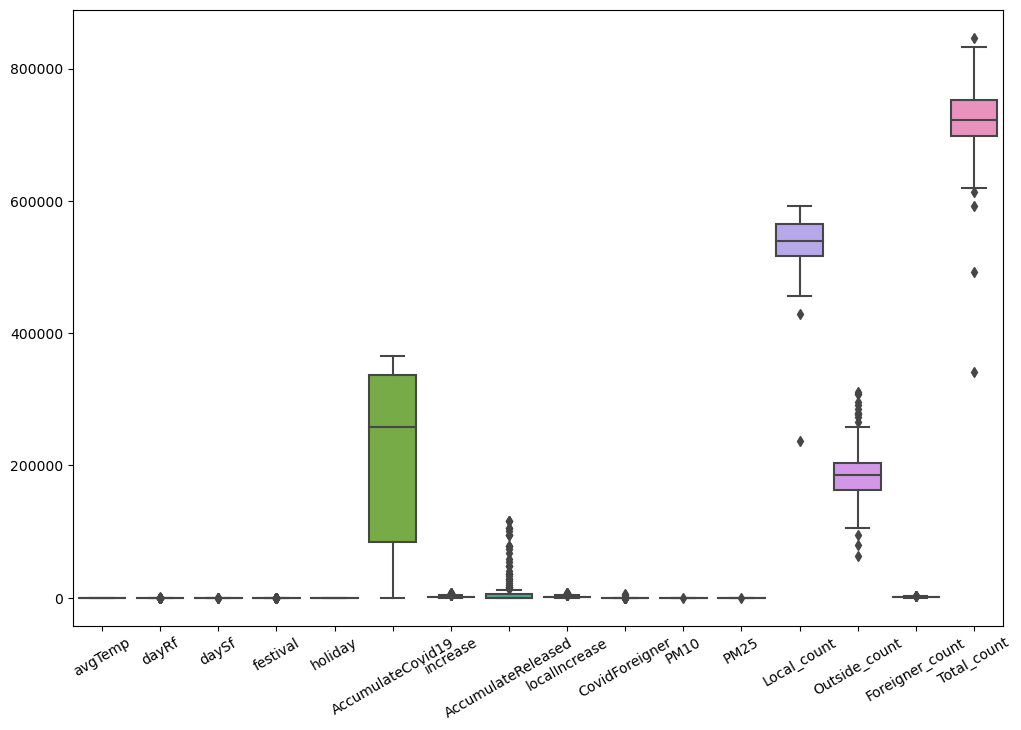

In [64]:
plt.figure(figsize=(12, 8))
df_box = sns.boxplot(data=df_jeju)
df_box.set_xticklabels(df_box.get_xticklabels(),rotation = 30)
plt.show()

In [65]:
df.columns

Index(['areaNm', 'daywkDivNm', 'baseYmd', 'avgTemp', 'dayRf', 'daySf',
       'festival', 'holiday', 'AccumulateCovid19', 'increase',
       'AccumulateReleased', 'localIncrease', 'CovidForeigner', 'PM10', 'PM25',
       'Local_count', 'Outside_count', 'Foreigner_count', 'Total_count'],
      dtype='object')

In [66]:
df_jeju
dfy = df_jeju.drop(columns=['areaNm', 'daywkDivNm', 'baseYmd', 'avgTemp', 'dayRf', 'daySf',
       'festival', 'holiday', 'AccumulateCovid19', 'increase',
       'AccumulateReleased', 'localIncrease', 'CovidForeigner', 'PM10', 'PM25'])
dfX = df_jeju.drop(columns=['areaNm', 'daywkDivNm', 'baseYmd', 'Local_count', 'Outside_count', 'Foreigner_count', 'Total_count'])
dfX.astype(float)
df_Xy = pd.concat([dfy, dfX], axis=1)

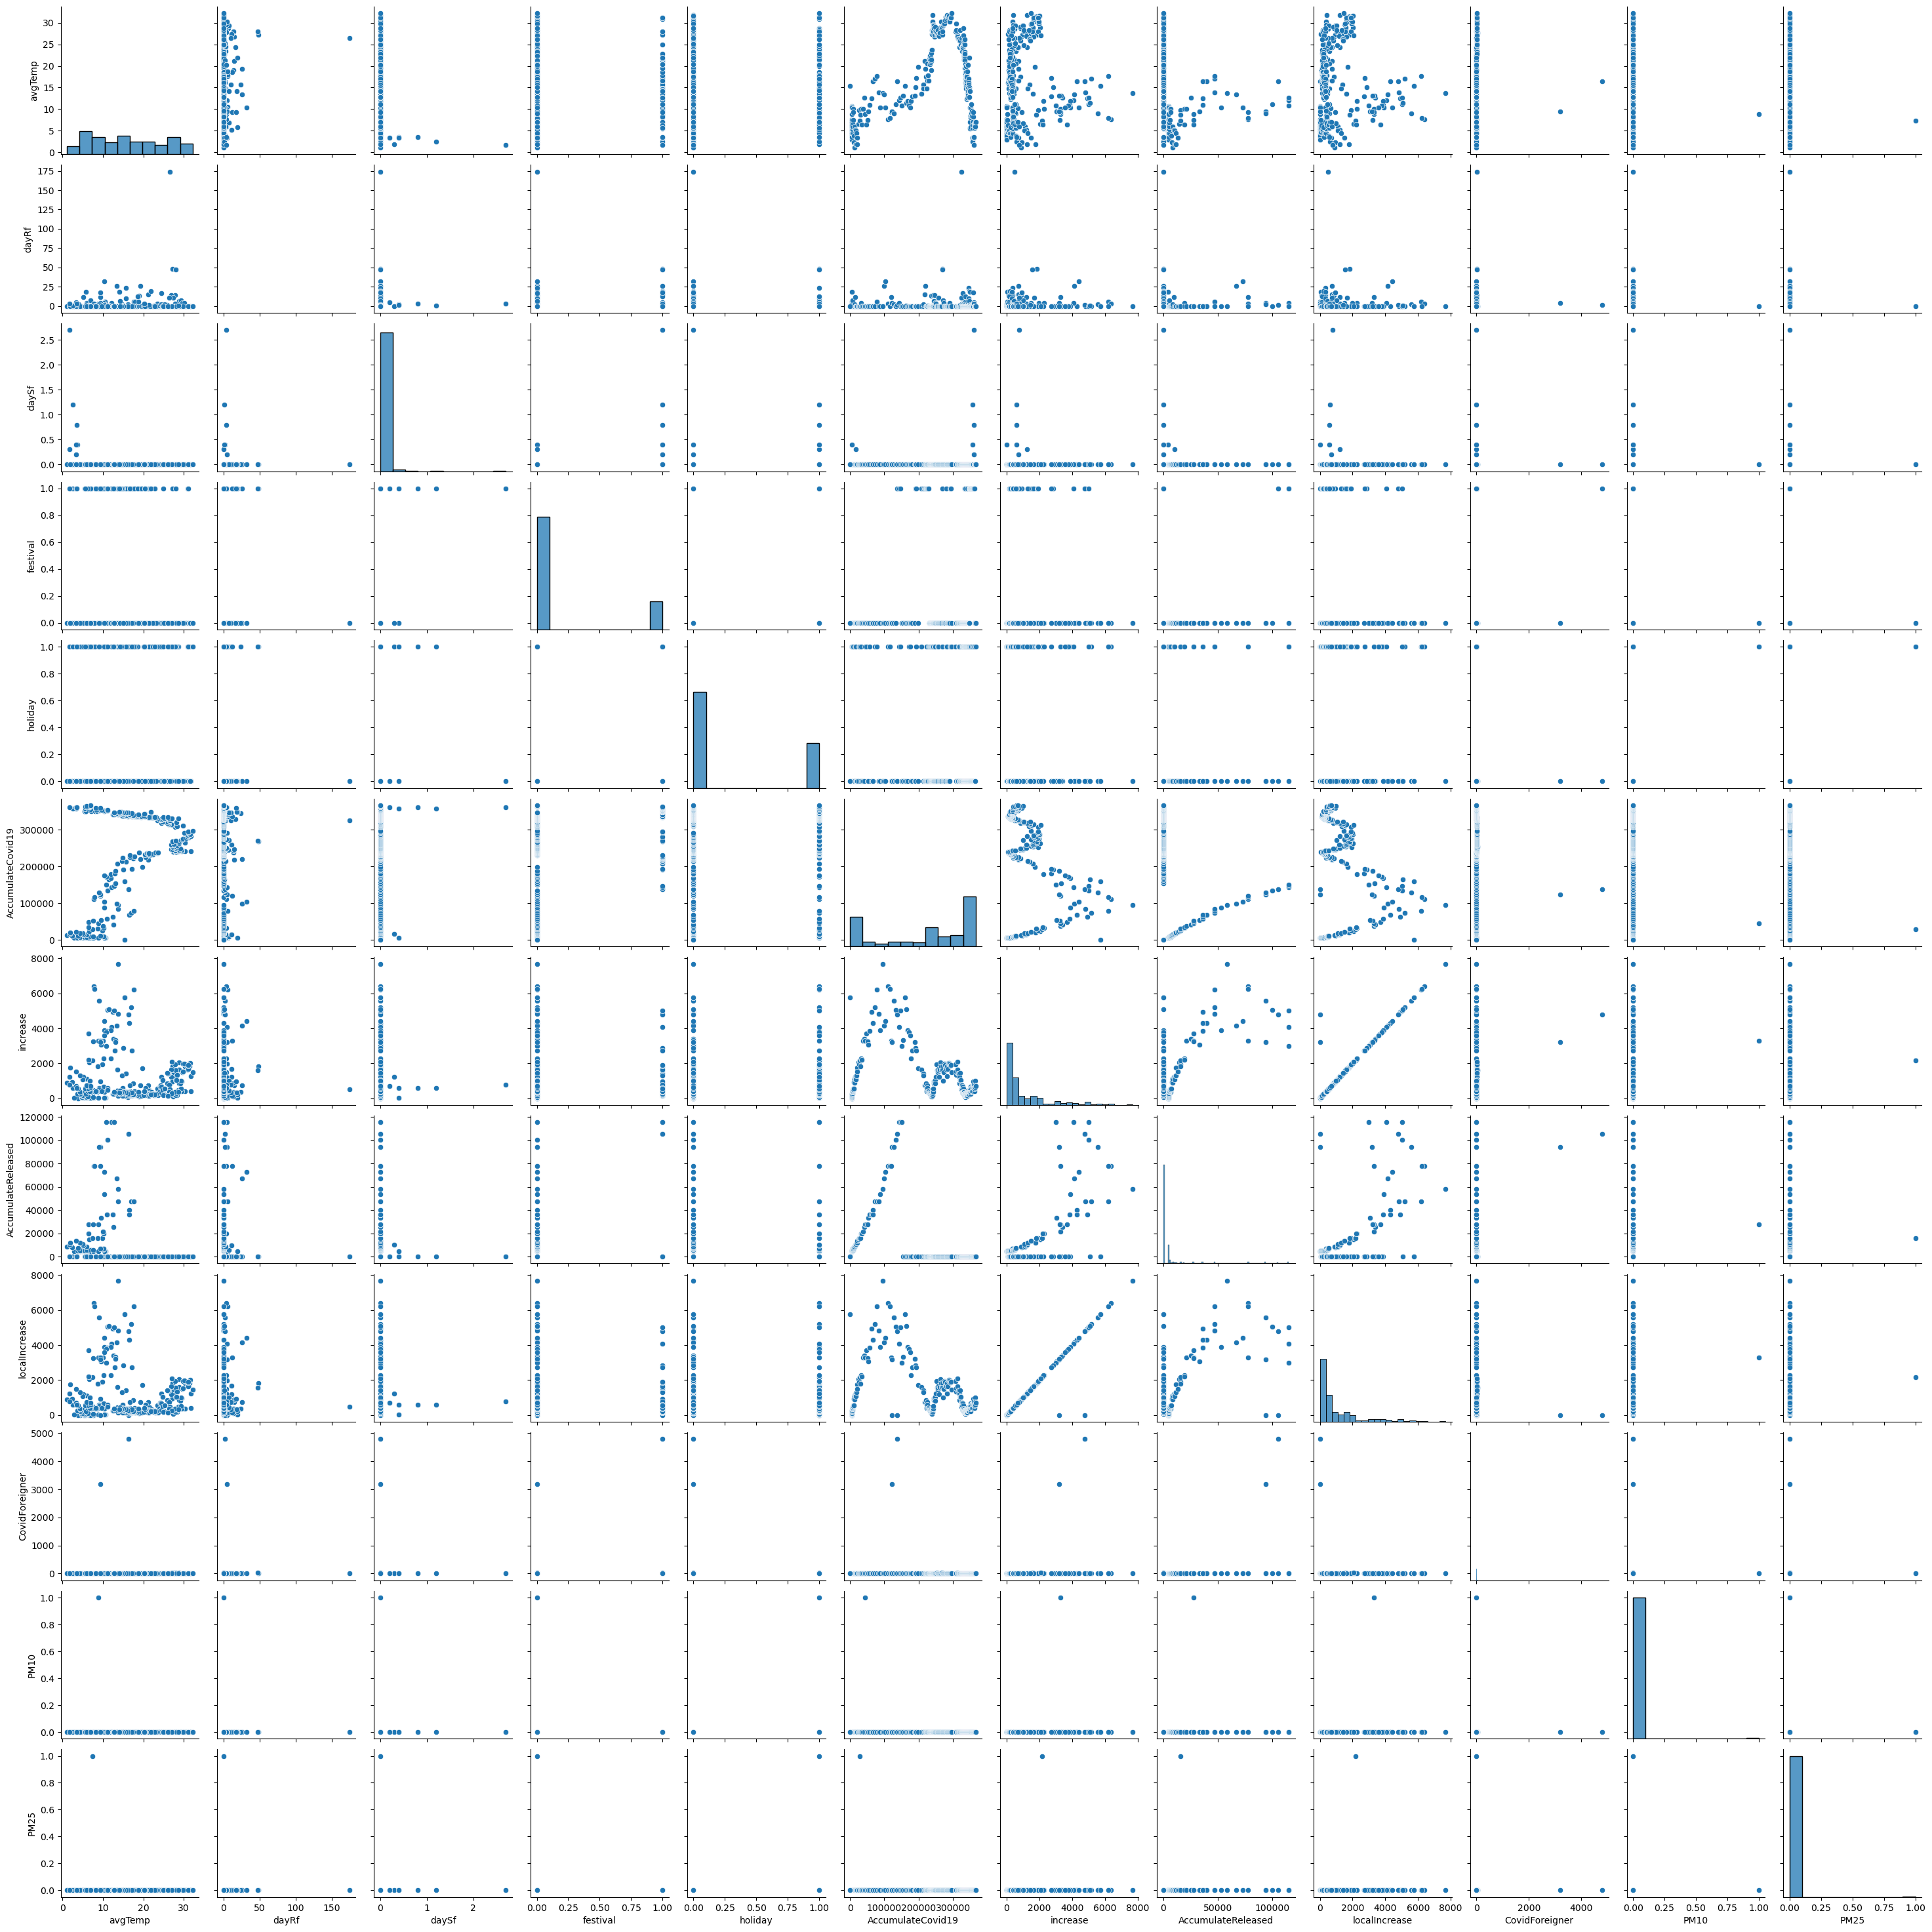

In [68]:
plt
sns.pairplot(dfX)
plt.show()

In [67]:
dfX.corr()


,avgTemp,dayRf,daySf,festival,holiday,AccumulateCovid19,increase,AccumulateReleased,localIncrease,CovidForeigner,PM10,PM25
avgTemp,1.000000,0.101795,-0.174417,-0.116917,0.018977,0.519218,-0.013879,-0.223261,-0.011292,-0.011828,-0.047544,-0.057505
dayRf,0.101795,1.000000,0.001775,0.059851,-0.014539,0.050734,0.017207,0.030583,0.016533,0.003849,-0.012084,-0.012084
daySf,-0.174417,0.001775,1.000000,0.188527,0.031477,0.082218,-0.032620,-0.035278,-0.030811,-0.009565,-0.006305,-0.006305
festival,-0.116917,0.059851,0.188527,1.000000,0.152301,0.299978,-0.044564,-0.007931,-0.063298,0.077445,-0.028571,-0.028571
holiday,0.018977,-0.014539,0.031477,0.152301,1.000000,-0.018134,-0.004414,-0.002022,0.008287,-0.054462,0.084050,0.084050
AccumulateCovid19,0.519218,0.050734,0.082218,0.299978,-0.018134,1.000000,-0.272510,-0.347165,-0.264398,-0.050005,-0.076195,-0.083234
increase,-0.013879,0.017207,-0.032620,-0.044564,-0.004414,-0.272510,1.000000,0.691558,0.972998,0.171692,0.088763,0.043594
AccumulateReleased,-0.223261,0.030583,-0.035278,-0.007931,-0.002022,-0.347165,0.691558,1.000000,0.619069,0.348431,0.054612,0.021796
localIncrease,-0.011292,0.016533,-0.030811,-0.063298,0.008287,-0.264398,0.972998,0.619069,1.000000,-0.060328,0.091141,0.045293
CovidForeigner,-0.011828,0.003849,-0.009565,0.077445,-0.054462,-0.050005,0.171692,0.348431,-0.060328,1.000000,-0.005140,-0.004790


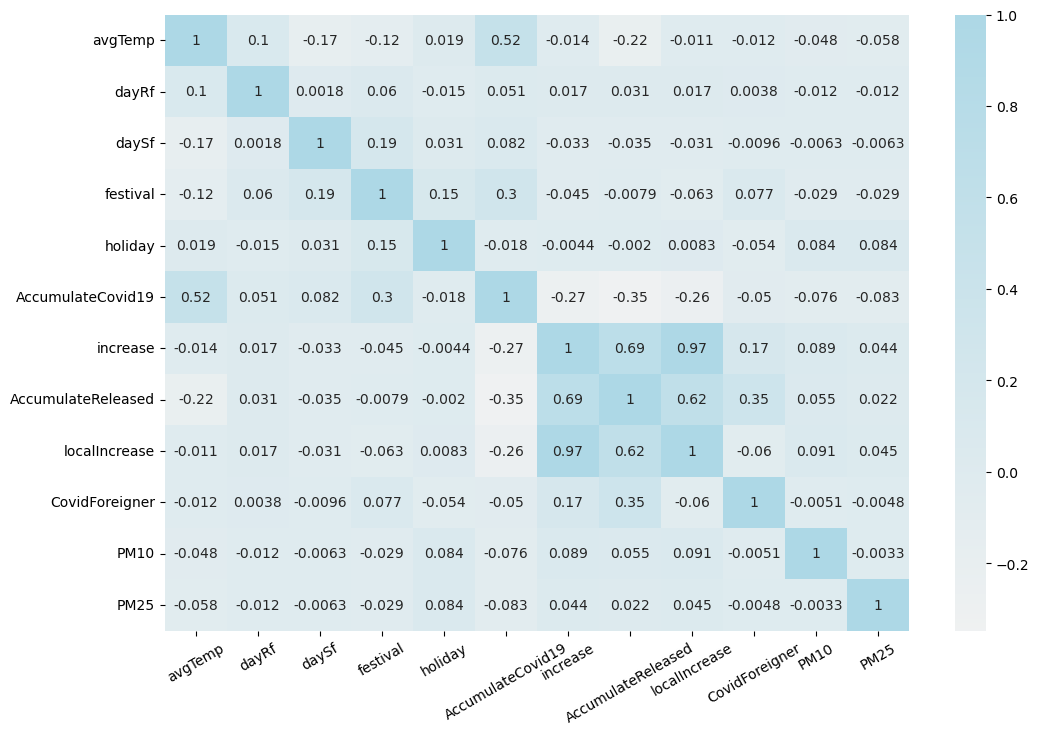

In [69]:
%matplotlib inline
plt.figure(figsize=(12, 8))
cmap = sns.light_palette("lightblue", as_cmap=True)
df_heat = sns.heatmap(dfX.corr(), annot=True, cmap=cmap)
df_heat.set_xticklabels(df_heat.get_xticklabels(),rotation = 30)
plt.show()

In [71]:
# 학습용 7 : 검증용 3
def get_model1(seed):
    df_train, df_test = train_test_split(df_Xy, test_size=0.3, random_state=seed)
    model = sm.OLS.from_formula("Total_count ~ avgTemp + dayRf + daySf + festival + holiday + AccumulateCovid19 + increase + AccumulateReleased + localIncrease + CovidForeigner + PM10 + PM25", data=df_train)
    return df_train, df_test, model.fit()

df_train, df_test, result = get_model1(3)
result.summary()

c:\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_count   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     6.780
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           4.28e-09
Time:                        15:43:37   Log-Likelihood:                -2586.0
No. Observations:                 214   AIC:                             5194.
Df Residuals:                     203   BIC:                             5231.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           7.075e+05   8057.931     87.797      0.000    6.92e+05    7.23e+05
avgTemp              954.0424    468.777      2.035      0.043      29.746    1878.339
dayRf              -1075.9643    233.843     -4.601      0.000   -1537.037    -614.891
daySf              -4.445e+04   1.54e+04     -2.883      0.004   -7.49e+04    -1.4e+04
festival             224.1981   8509.890      0.026      0.979   -1.66e+04     1.7e+04
holiday            -1.774e+04   6686.449     -2.653      0.009   -3.09e+04   -4552.702
AccumulateCovid19      0.0703      0.032      2.169      0.031       0.006       0.134
increase              -3.2491      3.982     -0.816      0.416     -11.101       4.603
AccumulateReleased    -0.0360      0.208     -0.173      0.863      -0.447       0.375
localIncrease         -1.7263      3.408     -0.507      0.613      -8.446       4.994
CovidForeigner        -1.5228      6.720     -0.227      0.821     -14.774      11.728
PM10                        0          0        nan        nan           0           0
PM25                1.629e+04   4.46e+04      0.365      0.716   -7.17e+04    1.04e+05
==============================================================================
Omnibus:                      196.129   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8185.965
Skew:                          -3.185   Prob(JB):                         0.00
Kurtosis:                      32.622   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [73]:
# Total Sum of Square (종속변수 y의 분산)
# Residual Sum of Square (잔차의 분산, 오차의 크기)
def calc_r2(df_test, result):
    target = df_Xy.loc[df_test.index].Total_count # 실제값
    predict_test = result.predict(df_test) # 예측값
    RSS = ((predict_test - target) ** 2).sum() # 잔차의 분산
    TSS = ((target - target.mean()) ** 2).sum() # 실제값의 분산
    return 1 - RSS / TSS # 결정계수

train1 = []
test1 = []
for i in range(10):
    df_train, df_test, result = get_model1(i)
    train1.append(calc_r2(df_train, result))
    test1.append(calc_r2(df_test, result))

# 과적합 문제가 있음 (학습용과 검증용 차이가 많이남.)
print(train1)
print(test1)

[0.4329721774783267, 0.31640302351551863, 0.2720659582667383, 0.25037064562541433, 0.4173248119984655, 0.3283890131210472, 0.2708516468333665, 0.23398553970369207, 0.32464877703292794, 0.35335878707136326]
[0.1657479207503807, 0.03665453556458098, 0.042721441448029585, 0.46083772015611435, 0.1829774243143536, 0.2709215007773389, 0.21651370313164053, 0.09665677650328164, 0.1849745663025163, 0.1471042005665717]


In [74]:
vif = pd.DataFrame()
vif["VIF FActor"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif.sort_values("VIF FActor")

c:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF FActor,features
11,1.017467,PM25
10,1.023534,PM10
1,1.068243,dayRf
2,1.097459,daySf
4,1.480452,holiday
3,1.658437,festival
7,2.637095,AccumulateReleased
5,6.449229,AccumulateCovid19
0,6.780456,avgTemp
6,inf,increase


In [55]:
# VIF 와 pvalue가 높은 increase, localIncrease, CovidForeigner 변수을 제거하고 스케일링 처리한 모형
def get_model2(seed):
    df_train, df_test = train_test_split(df, test_size=0.5, random_state=seed)
    model = sm.OLS.from_formula("Total_count ~ avgTemp + dayRf + daySf + festival + holiday + AccumulateCovid19 + AccumulateReleased + PM10 + PM25", data=df_train)
    return df_train, df_test, model.fit()

df_train, df_test, result2 = get_model2(3)
print(result2.summary())
# 성능 향상

                            OLS Regression Results                            
Dep. Variable:            Total_count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     1326.
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:38:24   Log-Likelihood:                -39610.
No. Observations:                2630   AIC:                         7.924e+04
Df Residuals:                    2620   BIC:                         7.930e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.334e+05   3.11

In [ ]:
# 스케일링 전 전체 관광객
col_list = ['avgTemp', 'dayRf', 'daySf', 'festival', 'holiday', 'AccumulateCovid19', 'increase', 'AccumulateReleased', 'localIncrease', 'CovidForeigner', 'PM10', 'PM25']

model = sm.OLS.from_formula("Total_count ~" + "+".join(col_list), data=df)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     2130.
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:38:41   Log-Likelihood:                -79061.
No. Observations:                5261   AIC:                         1.581e+05
Df Residuals:                    5248   BIC:                         1.582e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.159e+05   2.15e+04     28.629      0.000    5.74e+05    6.58e+05
avgTemp            -9573.8356   1160.514     -8.250      0.000   -1.18e+04   -7298.745
dayRf              -1583.3056    853.371     -1.855      0.064   -3256.267      89.656
daySf              -4.132e+04   1.11e+04     -3.718      0.000   -6.31e+04   -1.95e+04
festival            9.491e+04   2.88e+04      3.296      0.001    3.85e+04    1.51e+05
holiday             1.556e+04   2.43e+04      0.639      0.523   -3.22e+04    6.33e+04
AccumulateCovid19      1.1778      0.009    131.852      0.000       1.160       1.195
increase            9.128e+04   5.29e+04      1.724      0.085   -1.25e+04    1.95e+05
AccumulateReleased     9.5040      0.250     38.022      0.000       9.014       9.994
localIncrease      -9.126e+04   5.29e+04     -1.724      0.085   -1.95e+05    1.25e+04
CovidForeigner      -9.13e+04   5.29e+04     -1.725      0.085   -1.95e+05    1.25e+04
PM10                -7.87e+04   1.27e+05     -0.621      0.535   -3.27e+05     1.7e+05
PM25                4.987e+05   9.93e+04      5.021      0.000    3.04e+05    6.93e+05
==============================================================================
Omnibus:                     2435.601   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31677.039
Skew:                           1.869   Prob(JB):                         0.00
Kurtosis:                      14.425   Cond. No.                     1.95e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 현지인
col_list = ['avgTemp', 'dayRf', 'daySf', 'festival', 'holiday', 'AccumulateCovid19', 'increase', 'AccumulateReleased', 'localIncrease', 'CovidForeigner', 'PM10', 'PM25']

model = sm.OLS.from_formula("Local_count ~" + "+".join(col_list), data=df)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Local_count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     2101.
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:18:44   Log-Likelihood:                -77824.
No. Observations:                5261   AIC:                         1.557e+05
Df Residuals:                    5248   BIC:                         1.558e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.256e+05    1.7e+04     30.906      0.000    4.92e+05    5.59e+05
avgTemp            -9016.4432    917.431     -9.828      0.000   -1.08e+04   -7217.898
dayRf              -1025.0715    674.622     -1.519      0.129   -2347.611     297.468
daySf              -3.263e+04   8785.862     -3.714      0.000   -4.99e+04   -1.54e+04
festival            4.507e+04   2.28e+04      1.980      0.048     444.108    8.97e+04
holiday            -1.423e+05   1.92e+04     -7.396      0.000    -1.8e+05   -1.05e+05
AccumulateCovid19      0.9251      0.007    131.002      0.000       0.911       0.939
increase            7.052e+04   4.18e+04      1.685      0.092   -1.15e+04    1.53e+05
AccumulateReleased     7.4418      0.198     37.661      0.000       7.054       7.829
localIncrease      -7.051e+04   4.18e+04     -1.685      0.092   -1.53e+05    1.15e+04
CovidForeigner     -7.054e+04   4.18e+04     -1.686      0.092   -1.53e+05    1.15e+04
PM10               -1.115e+04      1e+05     -0.111      0.911   -2.08e+05    1.85e+05
PM25                4.182e+05   7.85e+04      5.325      0.000    2.64e+05    5.72e+05
==============================================================================
Omnibus:                     2621.938   Durbin-Watson:                   1.404
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38765.155
Skew:                           2.016   Prob(JB):                         0.00
Kurtosis:                      15.672   Cond. No.                     1.95e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 외지인
col_list = ['avgTemp', 'dayRf', 'daySf', 'festival', 'holiday', 'AccumulateCovid19', 'increase', 'AccumulateReleased', 'localIncrease', 'CovidForeigner']

model = sm.OLS.from_formula("Outside_count ~" + "+".join(col_list), data=df)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Outside_count   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     1810.
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:18:51   Log-Likelihood:                -71990.
No. Observations:                5261   AIC:                         1.440e+05
Df Residuals:                    5250   BIC:                         1.441e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           9.066e+04   5576.700     16.258      0.000    7.97e+04    1.02e+05
avgTemp             -601.7842    301.749     -1.994      0.046   -1193.338     -10.230
dayRf               -565.2444    222.495     -2.540      0.011   -1001.427    -129.061
daySf              -8906.4448   2897.508     -3.074      0.002   -1.46e+04   -3226.125
festival            5.027e+04   7505.305      6.698      0.000    3.56e+04     6.5e+04
holiday             1.586e+05   6338.550     25.022      0.000    1.46e+05    1.71e+05
AccumulateCovid19      0.2515      0.002    108.031      0.000       0.247       0.256
increase            2.076e+04   1.38e+04      1.504      0.133   -6298.123    4.78e+04
AccumulateReleased     2.0574      0.065     31.570      0.000       1.930       2.185
localIncrease      -2.076e+04   1.38e+04     -1.504      0.133   -4.78e+04    6301.306
CovidForeigner     -2.077e+04   1.38e+04     -1.504      0.133   -4.78e+04    6293.974
==============================================================================
Omnibus:                     1532.347   Durbin-Watson:                   1.335
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9667.829
Skew:                           1.239   Prob(JB):                         0.00
Kurtosis:                       9.162   Cond. No.                     1.41e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 외국인
col_list = ['avgTemp', 'dayRf', 'daySf', 'festival', 'holiday', 'AccumulateCovid19', 'increase', 'AccumulateReleased', 'localIncrease', 'CovidForeigner']

model = sm.OLS.from_formula("Foreigner_count ~" + "+".join(col_list), data=df)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Foreigner_count   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     353.2
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:18:57   Log-Likelihood:                -47257.
No. Observations:                5261   AIC:                         9.454e+04
Df Residuals:                    5250   BIC:                         9.461e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            291.6199     50.661      5.756      0.000     192.303     390.936
avgTemp               16.2317      2.741      5.921      0.000      10.858      21.606
dayRf                  2.2042      2.021      1.091      0.276      -1.758       6.167
daySf                 33.9809     26.322      1.291      0.197     -17.621      85.583
festival            -111.5766     68.181     -1.636      0.102    -245.240      22.087
holiday             -100.2304     57.582     -1.741      0.082    -213.115      12.654
AccumulateCovid19      0.0011   2.11e-05     51.150      0.000       0.001       0.001
increase              67.0685    125.396      0.535      0.593    -178.760     312.897
AccumulateReleased     0.0078      0.001     13.104      0.000       0.007       0.009
localIncrease        -67.0691    125.396     -0.535      0.593    -312.897     178.759
CovidForeigner       -67.1067    125.390     -0.535      0.593    -312.923     178.710
==============================================================================
Omnibus:                     2033.722   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11699.313
Skew:                           1.752   Prob(JB):                         0.00
Kurtosis:                       9.410   Cond. No.                     1.41e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 서울특별시
df_seoul = df.loc[df['areaNm'] == '서울특별시']

col_list = ['avgTemp', 'dayRf', 'daySf', 'festival', 'holiday', 'AccumulateCovid19', 'increase', 'AccumulateReleased', 'localIncrease', 'CovidForeigner']

model = sm.OLS.from_formula("Total_count ~" + "+".join(col_list), data=df_seoul)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_count   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     85.75
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           1.10e-80
Time:                        12:19:06   Log-Likelihood:                -4167.6
No. Observations:                 302   AIC:                             8357.
Df Residuals:                     291   BIC:                             8398.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.861e+06   5.92e+04     98.940      0.000    5.74e+06    5.98e+06
avgTemp             6819.9785   1653.187      4.125      0.000    3566.259    1.01e+04
dayRf              -4678.9486    837.941     -5.584      0.000   -6328.143   -3029.755
daySf              -5.755e+04   2.49e+04     -2.309      0.022   -1.07e+05   -8488.206
festival           -4.001e+04   4.41e+04     -0.907      0.365   -1.27e+05    4.68e+04
holiday            -5.127e+05   3.03e+04    -16.920      0.000   -5.72e+05   -4.53e+05
AccumulateCovid19      0.1466      0.013     11.526      0.000       0.122       0.172
increase           -4.214e+04   8.72e+04     -0.483      0.629   -2.14e+05    1.29e+05
AccumulateReleased    -0.0685      0.221     -0.309      0.757      -0.504       0.367
localIncrease       4.214e+04   8.72e+04      0.483      0.629   -1.29e+05    2.14e+05
CovidForeigner      4.214e+04   8.72e+04      0.483      0.629   -1.29e+05    2.14e+05
==============================================================================
Omnibus:                        1.960   Durbin-Watson:                   1.111
Prob(Omnibus):                  0.375   Jarque-Bera (JB):                1.839
Skew:                          -0.039   Prob(JB):                        0.399
Kurtosis:                       3.374   Cond. No.                     4.17e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 강원도
df_gangwon = df.loc[df['areaNm'] == '강원도']

col_list = ['avgTemp', 'dayRf', 'daySf', 'festival', 'holiday', 'AccumulateCovid19', 'increase', 'AccumulateReleased', 'localIncrease', 'CovidForeigner']

model = sm.OLS.from_formula("Total_count ~" + "+".join(col_list), data=df_gangwon)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_count   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     70.33
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           2.58e-64
Time:                        12:19:12   Log-Likelihood:                -3985.1
No. Observations:                 309   AIC:                             7988.
Df Residuals:                     300   BIC:                             8022.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.143e+06   1.57e+04     73.028      0.000    1.11e+06    1.17e+06
avgTemp             7149.9605    576.359     12.405      0.000    6015.742    8284.179
dayRf              -1225.1671    354.679     -3.454      0.001   -1923.142    -527.192
daySf              -1.841e-07   4.06e-09    -45.324      0.000   -1.92e-07   -1.76e-07
festival            5.917e+04   1.32e+04      4.472      0.000    3.31e+04    8.52e+04
holiday             1.418e+05   1.23e+04     11.538      0.000    1.18e+05    1.66e+05
AccumulateCovid19      0.1573      0.024      6.516      0.000       0.110       0.205
increase              -1.5089      2.990     -0.505      0.614      -7.393       4.375
AccumulateReleased     0.1943      0.423      0.460      0.646      -0.637       1.026
localIncrease         -5.6064      2.509     -2.234      0.026     -10.545      -0.668
CovidForeigner         4.0974      4.835      0.847      0.397      -5.417      13.612
==============================================================================
Omnibus:                       11.208   Durbin-Watson:                   0.782
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.752
Skew:                           0.361   Prob(JB):                      0.00170
Kurtosis:                       3.686   Cond. No.                     7.03e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.96e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# 제주특별자치시도
df_jeju = df.loc[df['areaNm'] == '제주특별자치도']

col_list = ['avgTemp', 'dayRf', 'daySf', 'festival', 'holiday', 'AccumulateCovid19', 'increase', 'AccumulateReleased', 'localIncrease', 'CovidForeigner']

model = sm.OLS.from_formula("Total_count ~" + "+".join(col_list), data=df_jeju)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_count   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     15.40
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           1.43e-20
Time:                        12:19:19   Log-Likelihood:                -3678.9
No. Observations:                 306   AIC:                             7378.
Df Residuals:                     296   BIC:                             7415.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            7.09e+05   6242.217    113.586      0.000    6.97e+05    7.21e+05
avgTemp             1328.1762    363.718      3.652      0.000     612.376    2043.977
dayRf              -1124.5809    207.646     -5.416      0.000   -1533.230    -715.932
daySf              -4.103e+04   1.37e+04     -2.986      0.003   -6.81e+04    -1.4e+04
festival            -673.8967   6758.964     -0.100      0.921    -1.4e+04    1.26e+04
holiday            -2.504e+04   5148.668     -4.863      0.000   -3.52e+04   -1.49e+04
AccumulateCovid19      0.0597      0.025      2.418      0.016       0.011       0.108
increase              -4.5924      3.196     -1.437      0.152     -10.883       1.698
AccumulateReleased     0.0059      0.172      0.035      0.972      -0.333       0.345
localIncrease         -2.3503      2.612     -0.900      0.369      -7.492       2.791
CovidForeigner        -2.2421      5.325     -0.421      0.674     -12.722       8.238
==============================================================================
Omnibus:                      242.859   Durbin-Watson:                   0.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9720.440
Skew:                          -2.783   Prob(JB):                         0.00
Kurtosis:                      30.045   Cond. No.                     8.18e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.02e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# 서울특별시, 외국인
df_seoul_foreigner = df.loc[df['areaNm'] == '서울특별시']

col_list = ['avgTemp', 'dayRf', 'daySf', 'festival', 'holiday', 'AccumulateCovid19', 'increase', 'AccumulateReleased', 'localIncrease', 'CovidForeigner']

model = sm.OLS.from_formula("Foreigner_count ~" + "+".join(col_list), data=df_seoul)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Foreigner_count   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     22.44
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           5.67e-31
Time:                        12:19:24   Log-Likelihood:                -2805.5
No. Observations:                 302   AIC:                             5633.
Df Residuals:                     291   BIC:                             5674.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6109.8146    651.291      9.381      0.000    4827.976    7391.653
avgTemp              125.8479     18.176      6.924      0.000      90.076     161.620
dayRf                 -7.2452      9.213     -0.786      0.432     -25.377      10.887
daySf                429.1233    274.066      1.566      0.118    -110.280     968.527
festival            -846.9704    484.916     -1.747      0.082   -1801.358     107.417
holiday             -507.5007    333.140     -1.523      0.129   -1163.171     148.169
AccumulateCovid19      0.0003      0.000      2.326      0.021       5e-05       0.001
increase              42.4305    958.360      0.044      0.965   -1843.765    1928.626
AccumulateReleased    -0.0043      0.002     -1.766      0.078      -0.009       0.000
localIncrease        -42.4509    958.360     -0.044      0.965   -1928.647    1843.745
CovidForeigner       -42.4561    958.331     -0.044      0.965   -1928.595    1843.683
==============================================================================
Omnibus:                        2.362   Durbin-Watson:                   0.108
Prob(Omnibus):                  0.307   Jarque-Bera (JB):                2.421
Skew:                           0.187   Prob(JB):                        0.298
Kurtosis:                       2.771   Cond. No.                     4.17e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 데이터 불러오기
df = pd.read_csv('./data/result.csv', parse_dates=['baseYmd'], index_col='baseYmd')
df_seoul_foreigner = df.loc[df['areaNm'] == '서울특별시']
df_seoul_foreigner.drop(columns=['areaNm', 'daywkDivNm', 'Local_count', 'Outside_count', 'Foreigner_count'], inplace=True)
df_seoul_foreigner.sort_index(inplace=True)

# 시계열 분해 (트렌드, 계절성, 잔차)
decomposition = sm.tsa.seasonal_decompose(df_seoul_foreigner.asfreq('S'), model='additive')

# 트렌드, 계절성, 잔차 추출
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

# ARIMA 모델 학습 및 예측
model = sm.tsa.ARIMA(df_seoul_foreigner, order=(1, 1, 1))
results = model.fit()
forecast = results.forecast(steps=30)

# 결과 출력
print(trend.head())
print(seasonality.head())
print(residual.head())
print(forecast)


In [ ]:
df_seoul_foreigner['baseYmd'].duplicated().sum()

In [ ]:
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new)  # 상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="원래 데이터")
plt.plot(x_new, y_new, 'rs-', label="회귀분석 예측")
plt.xlabel("x")
plt.ylabel("y")
plt.title("선형 회귀분석의 예")
plt.legend()
plt.show()

In [ ]:
df = pd.read_csv('./data/result.csv', parse_dates=['baseYmd'])
sample = df.drop(columns=['areaNm', 'daywkDivNm', 'baseYmd'])

In [ ]:
dfX

,avgTemp,dayRf,daySf,festival,holiday,AccumulateCovid19,increase,AccumulateReleased,localIncrease,CovidForeigner,PM10,PM25
0,-4.3,0.0,0.0,0,1,226698.0,1464.0,177348.0,1429.0,35.0,0,0
1,1.9,0.0,0.0,0,1,25287.0,212.0,21163.0,210.0,2.0,0,0
2,-2.3,0.0,0.0,0,1,23249.0,125.0,21394.0,125.0,0.0,0,0
3,-3.4,0.0,0.0,0,1,36962.0,241.0,30703.0,239.0,2.0,0,0
4,-0.1,0.0,0.0,0,1,8118.0,92.0,7349.0,91.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5256,1.1,0.0,0.0,0,1,972878.0,1799.0,0.0,1798.0,1.0,0,0
5257,0.5,0.0,0.0,1,1,947524.0,2117.0,0.0,2116.0,1.0,0,0
5258,-3.6,0.0,0.0,0,1,1326714.0,3006.0,0.0,3003.0,3.0,0,0
5259,2.0,0.0,0.0,0,1,1733021.0,4344.0,0.0,4342.0,2.0,0,0


In [ ]:
dfy

,AccumulateCovid19,increase,AccumulateReleased,localIncrease,CovidForeigner,PM10,PM25,Local_count,Outside_count,Foreigner_count,Total_count
0,226698.0,1464.0,177348.0,1429.0,35.0,0,0,3698524,1171118,3807,4873448
1,25287.0,212.0,21163.0,210.0,2.0,0,0,1206936,445102,2166,1654204
2,23249.0,125.0,21394.0,125.0,0.0,0,0,1013702,264114,218,1278033
3,36962.0,241.0,30703.0,239.0,2.0,0,0,1076912,496692,2528,1576132
4,8118.0,92.0,7349.0,91.0,1.0,0,0,616735,161028,100,777863
...,...,...,...,...,...,...,...,...,...,...,...
5256,972878.0,1799.0,0.0,1798.0,1.0,0,0,979002,370013,287,1349303
5257,947524.0,2117.0,0.0,2116.0,1.0,0,0,930996,475352,340,1406689
5258,1326714.0,3006.0,0.0,3003.0,3.0,0,0,1341977,726484,278,2068739
5259,1733021.0,4344.0,0.0,4342.0,2.0,0,0,1599500,612486,556,2212542


In [ ]:
scaler = StandardScaler()
df_sample = scaler.fit_transform(sample)
df_sample2 = pd.DataFrame(df_sample, columns=sample.columns)
df_sample2

,avgTemp,dayRf,daySf,festival,holiday,AccumulateCovid19,increase,AccumulateReleased,localIncrease,CovidForeigner,PM10,PM25,Local_count,Outside_count,Foreigner_count,Total_count
0,-1.580092,-0.23909,-0.078193,-0.500238,1.470258,-0.537314,-0.329873,2.480906,-0.326879,-0.042913,-0.089708,-0.115281,1.421211,1.617305,0.857450,1.485134
1,-0.987620,-0.23909,-0.078193,-0.500238,1.470258,-0.679494,-0.447836,-0.001138,-0.444197,-0.056443,-0.089708,-0.115281,-0.187585,-0.005961,0.198944,-0.148530
2,-1.388972,-0.23909,-0.078193,-0.500238,1.470258,-0.680933,-0.456033,0.002533,-0.452378,-0.057263,-0.089708,-0.115281,-0.312355,-0.410624,-0.582756,-0.339425
3,-1.494088,-0.23909,-0.078193,-0.500238,1.470258,-0.671252,-0.445104,0.150469,-0.441406,-0.056443,-0.089708,-0.115281,-0.271540,0.109387,0.344208,-0.188149
4,-1.178740,-0.23909,-0.078193,-0.500238,1.470258,-0.691614,-0.459142,-0.220665,-0.455650,-0.056853,-0.089708,-0.115281,-0.568673,-0.641109,-0.630107,-0.593245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5256,-1.064068,-0.23909,-0.078193,-0.500238,1.470258,-0.010571,-0.298309,-0.337453,-0.291365,-0.056853,-0.089708,-0.115281,-0.334760,-0.173849,-0.555067,-0.303258
5257,-1.121404,-0.23909,-0.078193,1.999050,1.470258,-0.028469,-0.268347,-0.337453,-0.260761,-0.056853,-0.089708,-0.115281,-0.365757,0.061674,-0.533799,-0.274136
5258,-1.513200,-0.23909,-0.078193,-0.500238,1.470258,0.239209,-0.184586,-0.337453,-0.175394,-0.056033,-0.089708,-0.115281,-0.100390,0.623168,-0.558679,0.061833
5259,-0.978064,-0.23909,-0.078193,-0.500238,1.470258,0.526029,-0.058519,-0.337453,-0.046527,-0.056443,-0.089708,-0.115281,0.065890,0.368285,-0.447122,0.134809


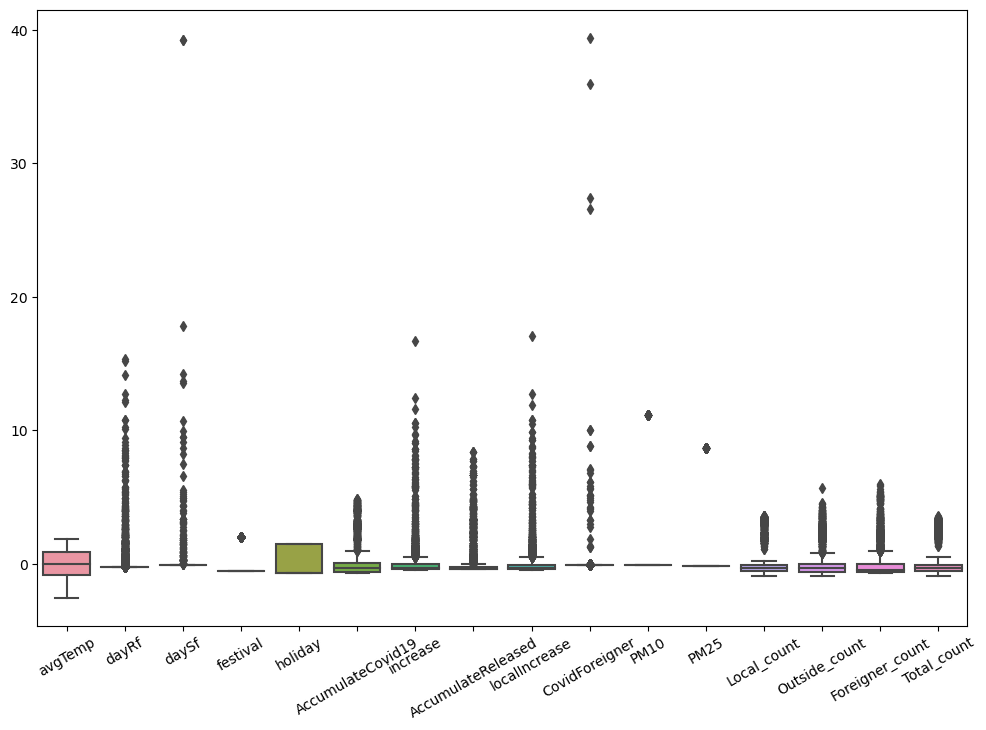

In [ ]:
plt.figure(figsize=(12, 8))
df_sample2_box = sns.boxplot(data=df_sample2)
df_sample2_box.set_xticklabels(df_sample2_box.get_xticklabels(),rotation = 30)
plt.show()

In [ ]:
# 전체 관광객
col_list = ['avgTemp', 'dayRf', 'daySf', 'festival', 'holiday', 'AccumulateCovid19', 'increase', 'AccumulateReleased', 'localIncrease', 'CovidForeigner', 'PM10', 'PM25']

model = sm.OLS.from_formula("Total_count ~" + "+".join(col_list), data=df_sample2)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     2130.
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:04:08   Log-Likelihood:                -2808.8
No. Observations:                5261   AIC:                             5644.
Df Residuals:                    5248   BIC:                             5729.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -8.24e-17      0.006  -1.45e-14      1.000      -0.011       0.011
avgTemp               -0.0508      0.006     -8.250      0.000      -0.063      -0.039
dayRf                 -0.0108      0.006     -1.855      0.064      -0.022       0.001
daySf                 -0.0214      0.006     -3.718      0.000      -0.033      -0.010
festival               0.0193      0.006      3.296      0.001       0.008       0.031
holiday                0.0037      0.006      0.639      0.523      -0.008       0.015
AccumulateCovid19      0.8467      0.006    131.852      0.000       0.834       0.859
increase             491.6090    285.121      1.724      0.085     -67.346    1050.564
AccumulateReleased     0.3035      0.008     38.022      0.000       0.288       0.319
localIncrease       -481.2103    279.131     -1.724      0.085   -1028.423      66.003
CovidForeigner      -113.0036     65.521     -1.725      0.085    -241.452      15.445
PM10                  -0.0036      0.006     -0.621      0.535      -0.015       0.008
PM25                   0.0288      0.006      5.021      0.000       0.018       0.040
==============================================================================
Omnibus:                     2435.601   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31677.039
Skew:                           1.869   Prob(JB):                         0.00
Kurtosis:                      14.425   Cond. No.                     1.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""